# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


**Цель исследования** - проверка следующих гипотез: 
1. Семейное положение клиента влияет на факт погашения кредита в срок.
2. Количество детей клиента влияет на факт погашения кредита в срок.
3. Платежеспособность клиента влияет на факт погашения кредита в срок.

In [1]:
# Импортируем модули, которые понадобятся по ходу работы
import seaborn as sns # Работа с диаграммами
import matplotlib.pyplot as plt # Работа с диаграммами
import pandas as pd # Интсрументы анализа данных
from collections import Counter # Подчсет значений
from pymystem3 import Mystem # Лемматизации данных
m = Mystem() 

## Импорт файла с данными и изучение общей информации

Для работы с таблицей нам необходимо импортировать библиотеку Pandas и воспользоваться встроенной в нее функцией чтения файла в переменную.

In [2]:
data = pd.read_csv('/datasets/data.csv') # В переменную data сохраняем прочитанный файл данных
data.head(30) # Выведем на экран первые 30 строк таблицы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем на экран и изучим общую информацию о таблице:

In [3]:
data.info() # Выводим общую информацию о таблице на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Таблица имеет 12 столбцов данных различных типов.

Согласно документации к данным:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита.

В названиях столбцов нарушений стиля нет. Однако, количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод** <br>
В каждой строке таблицы — данные о заемщике. Колонки описывают его профессиональные показатели, семейное и финансовое положение.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но, судя по общей статистике таблицы, встречаются пропуски в данных (в частности - в столбцах `'days_employed'` и `'total_income'`). Также сразу заметны потенциально неправильные данныые, требующие внимания и обработки: отрицательные числа в столбце `'days_employed'` и неявные дубликаты в столбцах `'education'` и `'purpose'`.

Столбец `'days_employed'` имеет в себе как отрицательные числа, так и большой диапазон разброса данных, что может говорить о том, что не все данные столбца представлены в днях - возможно, какие-то значения приведены в часах.

Чтобы двигаться дальше, нужно устранить указанные проблемы в данных.

## Предобработка данных

При первичной проверке было выявлено, что столбцы `'days_employed'` и `'total_income'` имеют в себе пропуски данных. Посчитаем и выведем на экран их количество в каждом столбце.

In [4]:
data.isna().sum() # Считаем количество пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

При начальном изучении было замечено, что пропуски в обоих указанных столбцах появляются в строке одновременно. При последующем изучении это подтвердилось, однако больше никакой взаимосвязи найти не удалось, поскольку пропуски появляются при различных комбинациях данных в других столбцах:

In [5]:
data[data['total_income'].isna() == True].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Пропуски в столбце `'days_employed'` не важны для этого исследования, соответственно их достаточно заменить явными обозначениями.
Но пропуски в `'total_income'` могут искажать картину исследования зависимости факта погашения кредита в срок от платежеспособности клиента, поскольку отсутствует почти 10% значений столбца. В реальном кейсе было бы правильно установить причину пропусков и восстановить данные, но в учебном проекте такой возможности нет. Придётся:

* выбрать, использование какого подхода будет более объективным: среднее или медианное,
* заполнить эти пропуски расчетными значением, 
* оценить, насколько такое решение повредят расчётам.

Поскольку это учебная работа, то есть смысл обработать все столбцы независимо от того, используются ли они в исследовании.

### Обработка пропусков

#### Столбец `'children'`

Далее проведем анализ и обработку данных по каждому столбцу, чтобы выявить неявные проблемы в данных. Начнем со столбца 'children':

In [6]:
data['children'].value_counts() # Выведем уникальные значения столбца 'children' и их количество

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Подозрение вызывают значения `-1` и `20`.

* Значение `-1`, вероятнее всего, в использованной системе сбора данных является признаком отсутствия детей у заемщика, и может быть заменено на значение `0`.
* Значение `20` похоже на опечатку, т.к. на клавиатуре цифры `2` и `0` находятся близко - соответственно, можено заменить его на `2`.

In [7]:
data.loc[data['children'] == -1, 'children'] = 0 # Заменяем все значения -1 на 0 в столбце 'children'
data.loc[data['children'] == 20, 'children'] = 2 # Заменяем все значения 20 на 2 в столбце 'children'
data['children'].value_counts() # Проверяем результаты замены

0    14196
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

#### Столбец `'dob_years'`

Проверим столбец `'dob_years'`:

In [8]:
data['dob_years'].unique() # Выведем все уникальные числа возраста

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

В столбце встречается значение `0`. Избавимся от него, заменив на средний возраст заемщика:

In [9]:
data.loc[data['dob_years'] == 0, 'dob_years'] = int(data['dob_years'].mean()) # Замена нулевых значений возраста на средние
data['dob_years'].unique() # Для проверки снова выведем все уникальные числа возраста

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75])

Возмоная причина появления ошибки - некорректное объединение данных, полученных из разных источников. Либо, источники не собирают информацию о дате рождения или возрасте своих клиентов - что для банковской сферы, опять же, маловероятно.

#### Столбцы `'education'` и `'education_id'`

In [10]:
data['education'].unique() # Выведем все уникальные значения столбца 'education'

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

В столбце присутствуют неявные дубликаты. Чтобы иметь возможность корректно обработать пропуски в других столбцах, произведем обработку дубликатов сейчас.
Значения отличаются только регистром, значит можно использовать метод .str.lower(), чтобы заменить все прописные буквы строчными.

In [11]:
data['education'] = data['education'].str.lower() # Меняем все прописные буквы строчными в таблице
data['education'].unique() # Проверим уникальные значения столбца

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [12]:
data[['education']].head() # Выводим таблицу для проверки результата

,education
0,высшее
1,среднее
2,среднее
3,среднее
4,среднее


In [13]:
data['education_id'].unique() # Выведем все уникальные значения 'education_id'

array([0, 1, 2, 3, 4])

Проблем нет. Всего пять ступеней образования - для каждой существует свой id.

#### Столбцы `'family_status'` и `'family_status_id'`

In [14]:
data['family_status'].unique() # Выведем все уникальные значения

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Для поддержания общего стиля, уберем прописную букву в `'Не женат / не замужем'`:

In [15]:
data['family_status'] = data['family_status'].str.lower() # Меняем все прописные буквы строчными в таблице
data['family_status'].unique() # Проверим уникальные значения столбца

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

In [16]:
data['family_status_id'].unique() # Выведем все уникальные значения

array([0, 1, 2, 3, 4])

Аналогично. Пять статусов - пять id. Все хорошо.

#### Столбец `'gender'`

In [17]:
data['gender'].unique() # Выведем все уникальные значения

array(['F', 'M', 'XNA'], dtype=object)

Присутствует значение `XNA`. Заменим его на наиболее встречающее значение:

In [18]:
data['gender'].value_counts() # Посчитаем количество значений

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Чаще встречается значение `F`. Используем его для замены:

In [19]:
data.loc[data['gender'] == 'XNA', 'gender'] = 'F' # Меняем значение
data['gender'].value_counts() # Выводим значения

F    14237
M     7288
Name: gender, dtype: int64

#### Столбец `'income_type'`

In [20]:
data['income_type'].unique() # Выведем все уникальные значения

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Проблем нет, движемся дальше.

#### Столбец `'debt'`

In [21]:
data['debt'].unique() # Выведем все уникальные значения

array([0, 1])

Проблем нет, движемся дальше.

#### Столбец `'purpose'`

In [22]:
data['purpose'].unique() # Выведем все уникальные значения

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

В столбце присутствуют неявные дубликаты. Они будут обработаны далее в работе.

#### Столбец `'days_employed'`

Столбец `'days_employed'` имеет в себе отрицательные значения и большой разброс данных. Изучим и исправим:

In [23]:
# Меняем знак для отрицательных значений
data.loc[data['days_employed'] < 0, 'days_employed'] = data.loc[data['days_employed'] < 0, 'days_employed'] * (-1)

Чтобы выбрать пороговое значение, после которого значение будет считаться "часовым", а не "дневным", построим диаграмму распределения, импортировав библиотеку `Seaborn`:

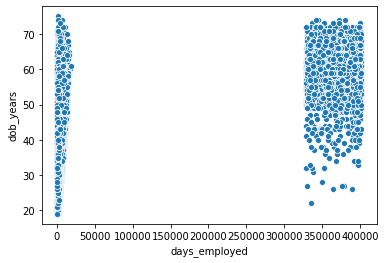

In [24]:
sns.scatterplot(x = data['days_employed'], y = data['dob_years']) # Строим диаграмму

Как видно из диаграммы, пороговым значением можно считать число `300000`. Пересчитаем значения, опираясь на это условие:

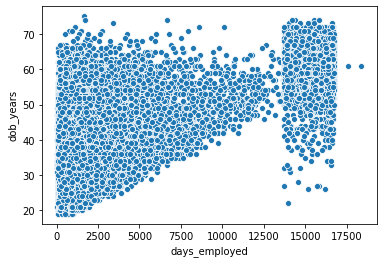

In [25]:
# Переводим крупные значения в часах в дни
data.loc[data['days_employed'] > 300000, 'days_employed'] = data.loc[data['days_employed'] > 30000, 'days_employed'] / 24
data['days_employed'].head(10) # Выведем первые 10 значений

# Для проверки еще раз строим диаграмму распределения
sns.scatterplot(x = data['days_employed'], y = data['dob_years'])

Затем заполним все пропуски в столбце `'days_employed'` медианным значением:

In [26]:
# Создаем таблицу, группируя данные по возрасту и образованию, и для групп считаем медианное значение стажа
med_employment = (data.groupby(['dob_years', 'education']).agg({'days_employed': 'median'}))
# Переименуем столбец 'days_employed' в 'med_days_employed'
med_employment = med_employment.rename(columns = {'days_employed': 'med_days_employed'})
# Присоединяем новую таблицу к исходной по столбцам 'dob_years' и 'education'
data = data.merge(med_employment, on = ['dob_years', 'education'])
# Пустые значения столбца 'days_employed' заменяем соответствующими значениями из 'med_days_employed'
data.loc[data['days_employed'].isna(), 'days_employed'] = data.loc[data['days_employed'].isna(), 'med_days_employed']

print('Пропусков в столбце:', data['days_employed'].isna().sum()) # Считаем количество явных пропусков

Пропусков в столбце: 0


Столбец `'med_days_employed'` оставляю в таблице для наглядности хода выполнения учебноого проекта.

#### Столбец `'total_income'`
Для обработки пропусков столбца рассчитаем медианное значение месячного заработка, сгруппировав данные по типу занятости:

In [27]:
for inc_type in data['income_type'].unique():
    # Сгруппируем данные по типу занятости и посчитаем медианный месячный заработок группы
    med_income = data.loc[data['income_type'] == inc_type, 'total_income'].median()
    # Пустые значения столбца 'total_income' заменяем соответствующими медианными значениями
    data.loc[(data['total_income'].isna()) & (data['income_type'] == inc_type), 'total_income'] = med_income
    
print('Пропусков в столбце:', data['total_income'].isna().sum()) # Считаем количество явных пропусков

Пропусков в столбце: 0


**Вывод** <br>
Все явные пропуски в таблице были устранены: 
* в столбце `'days_employed'` - медианным значением, рассчитанным для группы по возрасту и образованию;
* в столбце `'total_income'` - медианным значением месячных доходов, рассчитанным для группы по типу занятости.

Возможная причина появления такой пары пропусков - источник не предоставляет эти данные, хотя для банковской сферы это было бы странно. Другая возможная причина - техническая ошибка. В любом случае, в реальном кейсе было бы очень важно уточнить и заполнить реальными данными как минимум столбец `'total_income'`.

Также был устранен ряд неявных проблем с данными:
* Обработаны неверные значения в столбце `'children'`;
* Нулевые значения возраста заменены на средние в столбце `'dob_years'`;
* Ошибочное значение `XNA` заменено на наиболее распространенное `F` в столбце `'gender'`.

Возможные причины появления этих проблем указаны в работе выше для каждого столбца отдельно.

### Замена типа данных

Еще раз взгялнем на информацию о таблице:

Вещественный тип данных присвоен трем столбцам - `'days_employed'`, `'total_income'` и `'med_days_employed'`. Обратим их в целочисленный тип.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children             21525 non-null int64
days_employed        21525 non-null float64
dob_years            21525 non-null int64
education            21525 non-null object
education_id         21525 non-null int64
family_status        21525 non-null object
family_status_id     21525 non-null int64
gender               21525 non-null object
income_type          21525 non-null object
debt                 21525 non-null int64
total_income         21525 non-null float64
purpose              21525 non-null object
med_days_employed    21525 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.3+ MB


Напишем функцию, которая методом `.astype()` будет в указанных столбцах менять тип на выбранный пользователем:

In [29]:
def column_type_changer(columns, data_type):
    for column in columns:
        data[column] = data[column].astype(data_type)    

Воспользуемся ей, передав в нее список указанных выше столбцов и тип данных `'int'`.

In [30]:
columns_to_change = ['days_employed', 'total_income', 'med_days_employed'] # Список столбцов для смены типа данных
column_type_changer(columns_to_change, 'int')
data.info() # Проверим результат работы функции

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children             21525 non-null int64
days_employed        21525 non-null int64
dob_years            21525 non-null int64
education            21525 non-null object
education_id         21525 non-null int64
family_status        21525 non-null object
family_status_id     21525 non-null int64
gender               21525 non-null object
income_type          21525 non-null object
debt                 21525 non-null int64
total_income         21525 non-null int64
purpose              21525 non-null object
med_days_employed    21525 non-null int64
dtypes: int64(8), object(5)
memory usage: 2.3+ MB


**Вывод** <br>
Для удобства работы и восприятия таблицы тип данных в столбцах `'days_employed'`, `'total_income'` и `'med_days_employed'` был изменен с вещественного на целочисленный. Для этого была написа соответствующая функция. Другие столбцы в смене типа данных не нуждаются, поэтому оставляем их как есть.

### Обработка дубликатов

Частично дубликаты уже были обработаны в пункте **2.1** этой работы. Столбец `'purpose'` будет обработан далее, в разделе **2.4**.<br>
Проблема с дубликатами возникала в столбце `'education'` (раздел **2.1.3**), и была устранена методом замены прописных букв в словах на строчные. Возможны две причины ее возникновения - в разных системах сбора информации по-разному записываются данные об образовании, и никуда не деться от человеческого фактора.

In [31]:
data = data.drop_duplicates() # Удаляем все дубликаты строк
print('Количество дубликатов:', data.duplicated().sum()) # Проверим результат

Количество дубликатов: 0


**Вывод** <br>
В идеале - в данных должны присутствовать уникальные идентификаторы, которые позволили бы отличить дубликаты от нескольких заявок одного и того же клиента. Тем не менее, сейчас все одинаковые строки считаются дубликатами, и потому удаляются функицей `.drop_duplicates()`. Удалена была **71** повторяющаяся строка.

### Лемматизация

Для возожности категоризировать каждого из заемщиков по цели получения кредита и дальнейшего анализа, необходимо с помощью лемматизации эти группы выделить.

In [32]:
data['purpose'].unique() # Выводим уникальные значения столбца 'purpose'

array(['покупка жилья', 'операции с недвижимостью',
       'операции с коммерческой недвижимостью', 'свадьба',
       'операции с жильем', 'жилье', 'получение образования',
       'на проведение свадьбы', 'приобретение автомобиля',
       'операции со своей недвижимостью', 'заняться образованием',
       'строительство собственной недвижимости', 'сыграть свадьбу',
       'покупка своего жилья', 'образование',
       'на покупку своего автомобиля', 'сделка с подержанным автомобилем',
       'автомобиль', 'получение высшего образования',
       'заняться высшим образованием',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'ремонт жилью', 'покупка жилья для семьи',
       'получение дополнительного образования', 'профильное образование',
       'недвижимость', 'строительство жилой недвижимости',
       'сделка с автомобилем', 'автомобили', 'строительство недвижимости',
       'покупка недвижимости', 'покупка жилья для сдачи',
       'на покупку автомобиля

Далее объединим список в строку и лемматизируем ее:

In [33]:
purpose_list = ' '.join(data['purpose'].unique()) # Формируем строку

purpose_lemmas = m.lemmatize(purpose_list) # Сохраняем результат лемматизации
Counter(purpose_lemmas) # Подсчитываем и выводим количество повторений слов

Counter({'покупка': 10,
         ' ': 96,
         'жилье': 7,
         'операция': 4,
         'с': 5,
         'недвижимость': 10,
         'коммерческий': 2,
         'свадьба': 3,
         'получение': 3,
         'образование': 9,
         'на': 4,
         'проведение': 1,
         'приобретение': 1,
         'автомобиль': 9,
         'со': 1,
         'свой': 4,
         'заниматься': 2,
         'строительство': 3,
         'собственный': 1,
         'сыграть': 1,
         'сделка': 2,
         'подержанный': 1,
         'высокий': 3,
         'жилой': 2,
         'ремонт': 1,
         'для': 2,
         'семья': 1,
         'дополнительный': 2,
         'профильный': 1,
         'сдача': 1,
         'подержать': 1,
         '\n': 1})

По результатам лемматизации выберем самые повторяющие леммы и обозначим ими категории кредитования:
* `недвижимость`;
* `авто`;
* `свадьба`;
* `образование`;
* `прочее`.

Напишем функцию, присваивающую заемщикам категории на основе цели получения кредита, и применим ее:

In [34]:
def set_purpose_category(cell_data):
    cell_lemmas = m.lemmatize(cell_data) # Создаем переменную с леммами
    # Список условий для присвоения категории    
    if ('жилье' in cell_lemmas) or ('недвижимость' in cell_lemmas) or ('строительство' in cell_lemmas):
        return 'недвижимость'
    if 'автомобиль' in cell_lemmas:
        return 'авто'
    if 'свадьба' in cell_lemmas:
        return 'свадьба'
    if 'образование' in cell_lemmas:
        return 'образование'
    return 'прочее' 

data['purpose_category'] = data['purpose'].apply(set_purpose_category) # Применяем функцию к таблице
data[['purpose','purpose_category']].head(10) # Проверим результат работы

,purpose,purpose_category
0,покупка жилья,недвижимость
1,операции с недвижимостью,недвижимость
2,операции с коммерческой недвижимостью,недвижимость
3,свадьба,свадьба
4,операции с жильем,недвижимость
5,жилье,недвижимость
6,операции с жильем,недвижимость
7,получение образования,образование
8,на проведение свадьбы,свадьба
9,приобретение автомобиля,авто


In [35]:
data['purpose_category'].value_counts() # Подсчитаем количество значений в каждой категории

недвижимость    10811
авто             4306
образование      4013
свадьба          2324
Name: purpose_category, dtype: int64

Как можно видеть, по каждой из представленных целей кредита была присвоена категория, ничего не попало в `прочее`.

**Вывод** <br>
При помощи леммизации кадому заемщику была присвоена категория на основе его цели получения кредита. Для этого была создана функция, получающая на вход ячейку таблицы. Фильтр категорий отработал достаточно хорошо, чтобы не присваивать категорию `прочее`. <br>
Больше всего значений попало в категорию `недвижимость`. Далее по убыванию идут `авто`, `образование` и `свадьба`.

### Категоризация данных

Для проведения анализа данные необходимо категоризировать. Рассматривать будем 4 фактора:
* Наличие детей;
* Семейное положение;
* Уровень дохода;
* Цели получения кредита.

Последний пункт был выполнен в предыдущем разделе **2.4**.

#### Наличие детей
Рассмотрим два варианта категоризации: укрупненный (по признаку наличия детей) и более подробный (по количеству детей).

Укрупненный вариант:

In [36]:
# Создаем функицю присваивания категории по признаку наличия детей
def set_children_category(cell_data):
    if cell_data == 0:
        return 'детей нет'
    return 'дети есть'

# Создаем столбец 'children_category' и записываем в него результат работы функции
data['children_category'] = data['children'].apply(set_children_category)
data[['children_category']].drop_duplicates()

,children_category
0,дети есть
1,детей нет


Более подробный вариант:

In [37]:
# Категоризация заемщиков по количеству детей
data[['children']].drop_duplicates().sort_values(by = 'children').reset_index(drop=True)

,children
0,0
1,1
2,2
3,3
4,4
5,5


Уточненная категории заемщиков по количеству детей - данные описывают сами себя и в дополнительных пояснениях не нуждаются. Шесть уникальных значений - шесть категорий.

#### Семейное положение

In [38]:
data[['family_status_id', 'family_status']].drop_duplicates().set_index('family_status_id').sort_values(by = 'family_status_id')

,family_status
family_status_id,
0,женат / замужем
1,гражданский брак
2,вдовец / вдова
3,в разводе
4,не женат / не замужем


Получается пять категорий. Каждая однозначно определяется по присвоенному ей id.


#### Уровень дохода
Уровень дохода придется разбивать на категории самостоятельно. Для этого воспользуемся функцией `.qcut()`, делящей диапазон на  отрезки с равным количеством значений, попадающих в них. Для соответствия предыдущим разбивкам, возьмем пять отрезков и присовим на их основании категорию каждому заемщику в новом столбце `'income_category'`:

In [39]:
pd.qcut(data['total_income'], 5)

0        (214618.2, 2265604.0]
1        (214618.2, 2265604.0]
2        (214618.2, 2265604.0]
3         (20666.999, 98537.6]
4         (132134.4, 161335.0]
                 ...          
21520    (214618.2, 2265604.0]
21521     (161335.0, 214618.2]
21522     (161335.0, 214618.2]
21523      (98537.6, 132134.4]
21524      (98537.6, 132134.4]
Name: total_income, Length: 21454, dtype: category
Categories (5, interval[float64]): [(20666.999, 98537.6] < (98537.6, 132134.4] < (132134.4, 161335.0] < (161335.0, 214618.2] < (214618.2, 2265604.0]]

Данные о доходах будут делиться на категории по следующим диапазонам:
* менее 98661.6 - `низкий`;
* от 98661.7 до 132141.8 - `ниже среднего`;
* от 132141.89 до 161151.2 - `средний`;
* от 161151.3 до 214269.6 - `выше среднего`; 
* более 214269.6 - `высокий`.

In [40]:
labels = ['низкий', 'ниже среднего', 'средний', 'выше среднего', 'высокий'] # Создаем названия категорий
data['income_category'] = pd.qcut(data['total_income'], 5, labels=labels) # Присваиваем категории на основе доходов
data[['total_income', 'income_category']].head(10) # Проверяем результат работы

,total_income,income_category
0,253875,высокий
1,260465,высокий
2,320700,высокий
3,71263,низкий
4,151655,средний
5,250978,высокий
6,131237,ниже среднего
7,143875,средний
8,216200,высокий
9,162962,выше среднего


Выведем непосредственно имеющиеся категории:

In [41]:
data[['income_category']].drop_duplicates().sort_values(by = 'income_category').reset_index(drop = True)

,income_category
0,низкий
1,ниже среднего
2,средний
3,выше среднего
4,высокий


**Вывод** <br>
В разделе были категоризованы данные о наличии детей, семейном положении и уровне дохода. В случае семейного положения категории были представлены самим данными, наличие детей было описано категорией "есть/нет", а доход был описан функцией `.qcut()`. <br>
Категоризация целей получения кредита была произведена в пункте **2.4**, внимание на ней здесь не заостряется. 


## Ответы на вопросы

Для ответа на вопросы в каждом пункте строим сводную таблицу и считаем в ней процентное отношение задолженностей для каждой из выделенных категорий заемщиков.

### Зависимость между наличием детей и возвратом кредита в срок

Снача рассмотрим укрупненные категории:

In [42]:
# Создаем сводную таблицу по данным о детях и долгах
children_pivot = data.pivot_table(index = 'children_category', columns = 'debt', values = 'purpose', aggfunc = 'count')
children_pivot.columns = ['no debt', 'debt']

# Считаем процент заемщиков с задолженностями для категории
children_pivot['debt %'] = (children_pivot['debt'] / (children_pivot['debt'] + children_pivot['no debt'])) * 100
children_pivot.sort_values(by = 'debt %', ascending = False)

,no debt,debt,debt %
children_category,,,
дети есть,6639,677,9.253691
детей нет,13074,1064,7.525817


Для наглядности построим график:

Text(0, 0.5, '% должников')

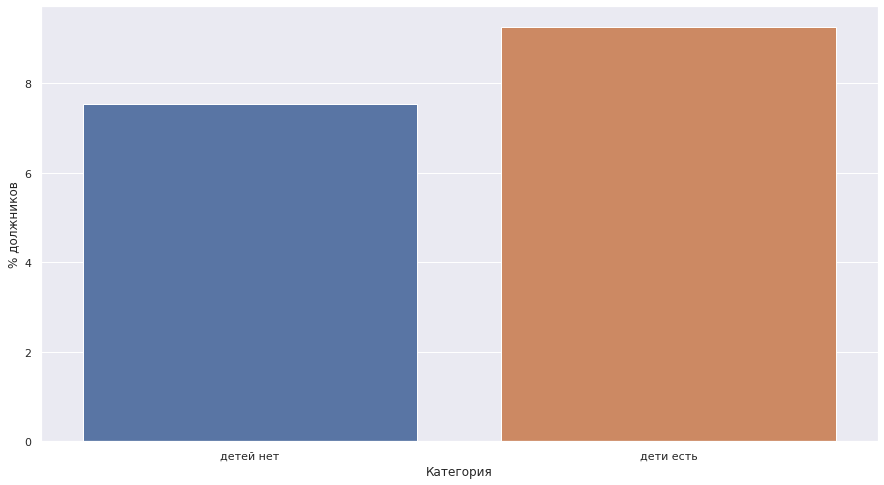

In [43]:
children_plot = children_pivot.reset_index() # Таблица без подкатегорий
sns.set(rc = {'figure.figsize': (15,8)}) # Изменяем размер графика
sns.barplot(x = 'children_category', y = 'debt %', data = children_plot)
plt.xlabel('Категория', size = 12) # Подпись оси Х
plt.ylabel('% должников', size = 12) # Подпись оси Y

**Вывод** <br>
Согласно полученным результатам, семьи `с детьми` на **1.74%** чаще имеют задолженности по кредитам. Однако, выборка семей с детьми почти в два раза меньше, чем семей без детей.

Затем проанализируем более мелкие категории - по количеству детей в семье:

In [44]:
# Создаем сводную таблицу по данным о детях и долгах
children_pivot_qty = data.pivot_table(index = 'children', columns = 'debt', values = 'purpose', aggfunc = 'count')
children_pivot_qty.columns = ['no debt', 'debt']
children_pivot_qty = children_pivot_qty.fillna(0) # Отсутствующие значения заменим нулем

# Считаем процент заемщиков с задолженностями для категории
children_pivot_qty['debt %'] = (children_pivot_qty['debt'] / (children_pivot_qty['debt'] + children_pivot_qty['no debt'])) * 100
children_pivot_qty.sort_values(by = 'debt %', ascending = False)

,no debt,debt,debt %
children,,,
4,37.0,4.0,9.756098
2,1926.0,202.0,9.492481
1,4364.0,444.0,9.234609
3,303.0,27.0,8.181818
0,13074.0,1064.0,7.525817
5,9.0,0.0,0.000000


Text(0, 0.5, '% должников')

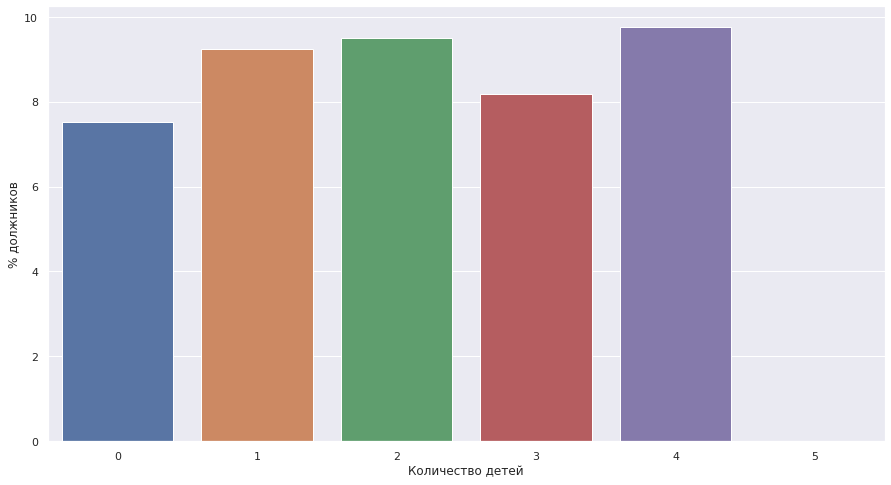

In [45]:
children_qty_plot = children_pivot_qty.reset_index() # Таблица без подкатегорий
sns.set(rc = {'figure.figsize': (15,8)}) # Изменяем размер графика
sns.barplot(x = 'children', y = 'debt %', data = children_qty_plot)
plt.xlabel('Количество детей', size = 12) # Подпись оси Х
plt.ylabel('% должников', size = 12) # Подпись оси Y

**Вывод** <br>
Результаты получились немного спорными - как минимум, результаты групп `3`, `4` и `5 детей` нельзя интерпретировать как однозначно достоверные, поскольку выборка исследуемых данных получается слишком мала. Что касается общего состояния - `наличие детей` в семье все еще является вероятным фактором задолженностей по кредитам, т.к. значения каждой категории выше, чем категории `без детей`. Можно сказать, что просматривается тренд - чем больше детей, тем выше вероятность иметь задолженность (но для подтверждения этой гипотезы нужна более обширная выборка данных).

### Зависимость между семейным положением и возвратом кредита в срок

In [46]:
# Создаем сводную таблицу по данным о семейном положении и долгах
family_pivot = data.pivot_table(index = 'family_status', columns = 'debt', values = 'purpose', aggfunc = 'count')
family_pivot.columns = ['no debt', 'debt']

# Считаем процент заемщиков с задолженностями для категории
family_pivot['debt %'] = (family_pivot['debt'] / (family_pivot['debt'] + family_pivot['no debt'])) * 100
family_pivot.sort_values(by = 'debt %', ascending = False)

,no debt,debt,debt %
family_status,,,
не женат / не замужем,2536,274,9.750890
гражданский брак,3763,388,9.347145
женат / замужем,11408,931,7.545182
в разводе,1110,85,7.112971
вдовец / вдова,896,63,6.569343


Text(0, 0.5, '% должников')

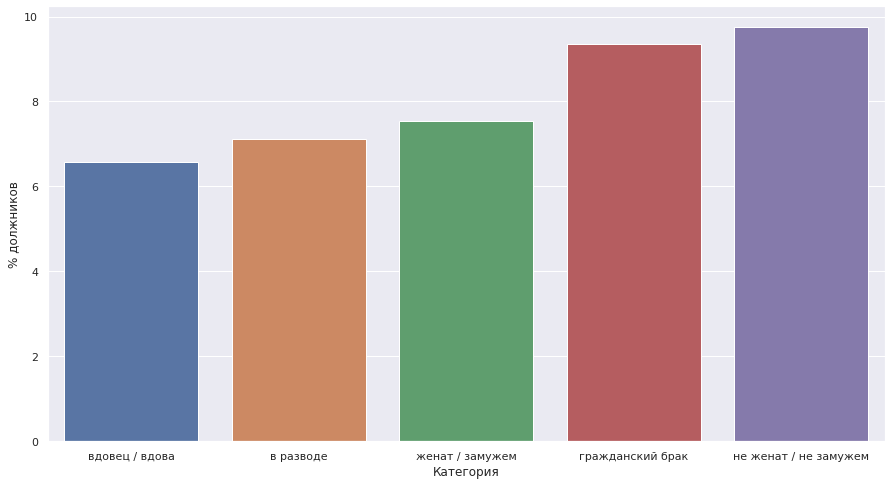

In [47]:
family_plot = family_pivot.reset_index() # Таблица без подкатегорий
sns.barplot(x = 'family_status', y = 'debt %', data = family_plot, order = family_plot.sort_values('debt %').family_status)
plt.xlabel('Категория', size = 12) # Подпись оси Х
plt.ylabel('% должников', size = 12) # Подпись оси Y

**Вывод** <br>
Как показало исследование, заемщики с семейным положением `не женат / не замужем` чаще всех имеют долги - в **9.74%** случаев. Далее по убыванию идут категории `гражданский брак`, `женат / замужем`, `в разводе`, `вдовец / вдова`. При том, люди, оставшие без законного партнера, имеют долги в среднем на **2.9%** реже, чем никогда не имевщие такового.

### Зависимость между уровнем дохода и возвратом кредита в срок

In [48]:
# Создаем сводную таблицу по данным о доходах и долгах
income_pivot = data.pivot_table(index = 'income_category', columns = 'debt', values = 'purpose', aggfunc = 'count')
income_pivot.columns = ['no debt', 'debt']

# Считаем процент заемщиков с задолженностями для категории
income_pivot['debt %'] = (income_pivot['debt'] / (income_pivot['debt'] + income_pivot['no debt'])) * 100
income_pivot.sort_values(by = 'debt %', ascending = False)

,no debt,debt,debt %
income_category,,,
средний,3915,375,8.741259
ниже среднего,3930,361,8.412957
выше среднего,3930,361,8.412957
низкий,3947,344,8.016779
высокий,3991,300,6.991377


Text(0, 0.5, '% должников')

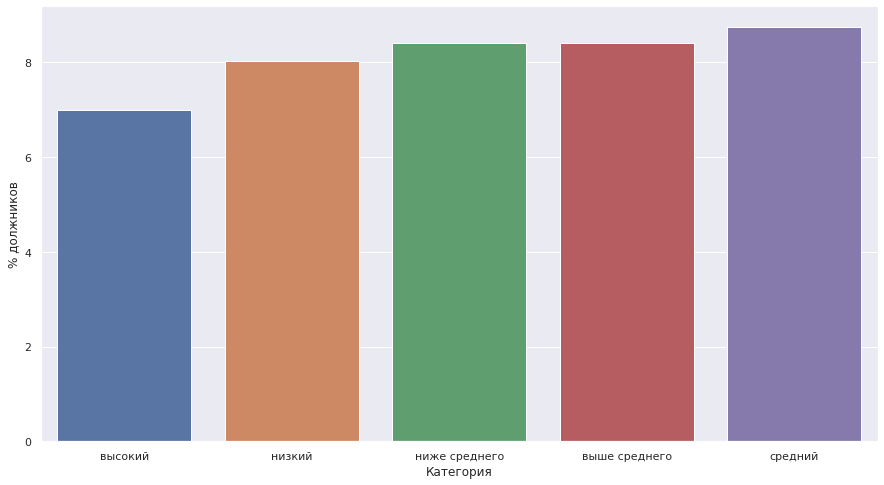

In [49]:
income_plot = income_pivot.reset_index() # Таблица без подкатегорий
sns.barplot(x = 'income_category', y = 'debt %', data = income_plot, order = income_plot.sort_values('debt %').income_category)
plt.xlabel('Категория', size = 12) # Подпись оси Х
plt.ylabel('% должников', size = 12) # Подпись оси Y

**Вывод** <br>
Чаще всего долги по кредиту имеют люди со `средним` достатком - в **8.69%** случаев. Минимальный показатель - у людей с `высоким` достатком - **7.02%**. Между ними, в порядке убывания, расположились заемщики с достатком `ниже среднего` и `выше среднего` (у них одинаковый процнент должников) и `низким`. Разница между максимальным и минимальным значением составляет **1.67%**.

### Влияние различных целей кредита на его возврат в срок

In [50]:
# Создаем сводную таблицу по данным о целях и долгах
purpose_pivot = data.pivot_table(index = 'purpose_category', columns = 'debt', values = 'purpose', aggfunc = 'count')
purpose_pivot.columns = ['no debt', 'debt']

# Считаем процент заемщиков с задолженностями для категории
purpose_pivot['debt %'] = (purpose_pivot['debt'] / (purpose_pivot['debt'] + purpose_pivot['no debt'])) * 100
purpose_pivot.sort_values(by = 'debt %', ascending = False)

,no debt,debt,debt %
purpose_category,,,
авто,3903,403,9.359034
образование,3643,370,9.220035
свадьба,2138,186,8.003442
недвижимость,10029,782,7.233373


Text(0, 0.5, '% должников')

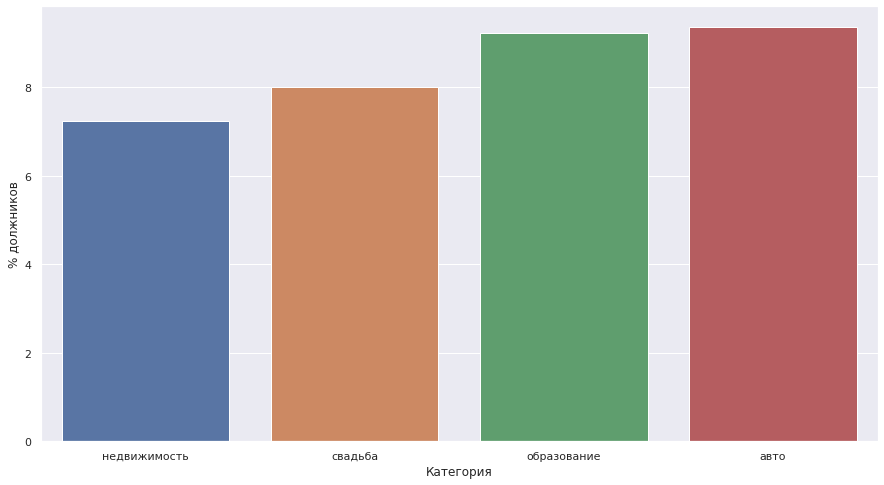

In [51]:
purpose_plot = purpose_pivot.reset_index() # Таблица без подкатегорий
sns.barplot(x = 'purpose_category', y = 'debt %', data = purpose_plot, order = purpose_plot.sort_values('debt %').purpose_category)
plt.xlabel('Категория', size = 12) # Подпись оси Х
plt.ylabel('% должников', size = 12) # Подпись оси Y

**Вывод** <br>
Чаще всех с опозданием платят заемщики, получавшие кредит на цели, связанные с `автомобилем` - в **9.34%** случаев. Рядом с ними располагаются `образовательные` кредиты - задолженности по ним есть у **9.2%** заемщиков. Наиболее ответственной оказывается категория, связанная с `недвижимостью` - в ней задолженности по кредиту имеются возникают только в **7.21%** случаев.

## Общий вывод

В данной работе была исследована зависимость различных факторов на частоту возврата кредита в срок. Исходные данные были обработаны различными инструментами `Python`, библетек `Pandas`, `Pymystem3` и `Collections`. При помощи библиотек `Seaborn` и `Matplotlib` были построены диаграммы.<br>
По итогам работы для каждой из исследованных категорий наименее и наиболее привлекательными заемщиками по частоте возвратов кредитов в срок явились:

In [52]:
# Создадим таблицу с результатами исследования
category = {'Наличие детей': ['Есть дети: 9.24%', 'Нет детей: 7.5%'],
            'Семейное положение': ['Не женат / не замужем: 9.74%', 'Вдовец / вдова: 6.56%'],
            'Уровень дохода': ['Средний: 8.69%', 'Высокий: 7.02%'],
            'Цель получения': ['Авто: 9.34%', 'Недвижимость: 7.21%']}
index = ['Наименее привлекательные', 'Наиболее привлекательные']
final_tab = pd.DataFrame(data = category, index = index)
final_tab

,Наличие детей,Семейное положение,Уровень дохода,Цель получения
Наименее привлекательные,Есть дети: 9.24%,Не женат / не замужем: 9.74%,Средний: 8.69%,Авто: 9.34%
Наиболее привлекательные,Нет детей: 7.5%,Вдовец / вдова: 6.56%,Высокий: 7.02%,Недвижимость: 7.21%
